<a href="https://colab.research.google.com/github/kdstheace/Project_FinancialAnalysis/blob/Daniel/Financial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
#1) 데이터 준비
raw_data = pd.read_csv('drive/MyDrive/Colab Notebooks/data/bankruptcy_data.csv')
X = raw_data.drop('Bankrupt?', axis=1).drop(' Liability-Assets Flag', axis=1).drop(' Net Income Flag', axis=1)\
            .drop(' Revenue Per Share (Yuan ¥)', axis=1).drop(' Operating Profit Per Share (Yuan ¥)', axis=1)\
            .drop(' Per Share Net profit before tax (Yuan ¥)', axis=1).drop(' Interest-bearing debt interest rate', axis=1)

y = np.array(raw_data['Bankrupt?'])
print(raw_data.shape)
print(X.shape)
print(y.shape)

(6819, 96)
(6819, 89)
(6819,)


In [118]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
display(scaled_X)

categorized_y = to_categorical(y)
print(categorized_y.shape)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,-0.616334,-0.750713,-0.545256,-0.829388,-1.279247,-1.275228,-1.276147,-1.794106,-0.671081,-0.025299,0.019997,-0.012031,-0.012262,-0.010299,-0.182259,-0.013721,-0.119118,-0.769297,-0.012111,-0.034237,-0.092520,-0.026226,1.750845,-1.750845,-0.133505,0.959784,0.041865,-0.471275,-1.460495,-0.332027,-0.540344,-0.045967,-0.038333,-0.661726,-0.407123,-0.155185,-0.017024,-0.237123,-0.038222,-2.393729,-1.155833,-1.520572,-0.861820,-0.020937,-0.072818,1.126267,-0.563752,-0.045371,-0.095887,-0.412896,-1.245334,0.568487,-0.094979,-1.232594,-0.043610,1.314027,-0.175421,1.299751,-0.019619,-0.685397,0.003948,-0.012111,-0.412896,0.568487,0.558428,-0.257031,-0.108218,-1.247231,-0.206594,2.812493,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,-0.616334,-0.750713,-0.326632,-0.829388,-0.251878,-0.250429,-0.251550,-0.597379,-0.303533,-0.027130,0.010035,0.039473,0.039663,-0.001930,0.207732,-0.013721,0.027847,-0.143117,-0.012111,-0.034237,0.372093,-0.026226,1.075727,-1.075727,-0.132282,0.129305,-0.010932,-0.548362,-0.446793,-0.355356,-0.762702,-0.045967,-0.038333,2.220288,-0.116896,-0.357471,-0.017024,-0.277557,-0.038222,-1.067133,-1.351081,-1.558280,-0.783873,-0.020937,-0.072818,-0.670363,-0.361990,1.169887,-0.095887,-2.192039,-0.328953,-0.123797,-0.094979,-0.143474,-0.026740,-0.1351

(6819, 2)


In [119]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, categorized_y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5455, 89)
(1364, 89)
(5455, 2)
(1364, 2)


In [121]:
model = Sequential()

model.add(Dense(units=100, activation='relu', input_dim=89))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 100)               9000      
_________________________________________________________________
dense_36 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_37 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_38 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 22        
Total params: 15,607
Trainable params: 15,607
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
171/171 [==============================] - 1s 4ms/step - loss: 0.2552 - accuracy: 0.9658 - val_loss: 0.1188 - val_accuracy: 0.9633
Epoch 2/50
171/171 [==============================] - 0s 2ms/step - loss: 0.0912 - accuracy: 0.9702 - val_loss: 0.1098 - val_accuracy: 0.9655
Epoch 3/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0806 - accuracy: 0.9698 - val_loss: 0.1091 - val_accuracy: 0.9670
Epoch 4/50
171/171 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9731 - val_loss: 0.1104 - val_accuracy: 0.9633
Epoch 5/50
171/171 [==============================] - 0s 2ms/step - loss: 0.0658 - accuracy: 0.9754 - val_loss: 0.1104 - val_accuracy: 0.9663
Epoch 6/50
171/171 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9720 - val_loss: 0.1229 - val_accuracy: 0.9560
Epoch 7/50
171/171 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9749 - val_loss: 0.1208 - val_accuracy: 0.9641
Epoch 

In [123]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

43/43 [==============================] - 0s 1ms/step - loss: 0.5371 - accuracy: 0.9663

loss: 53.71%

accuracy: 96.63%


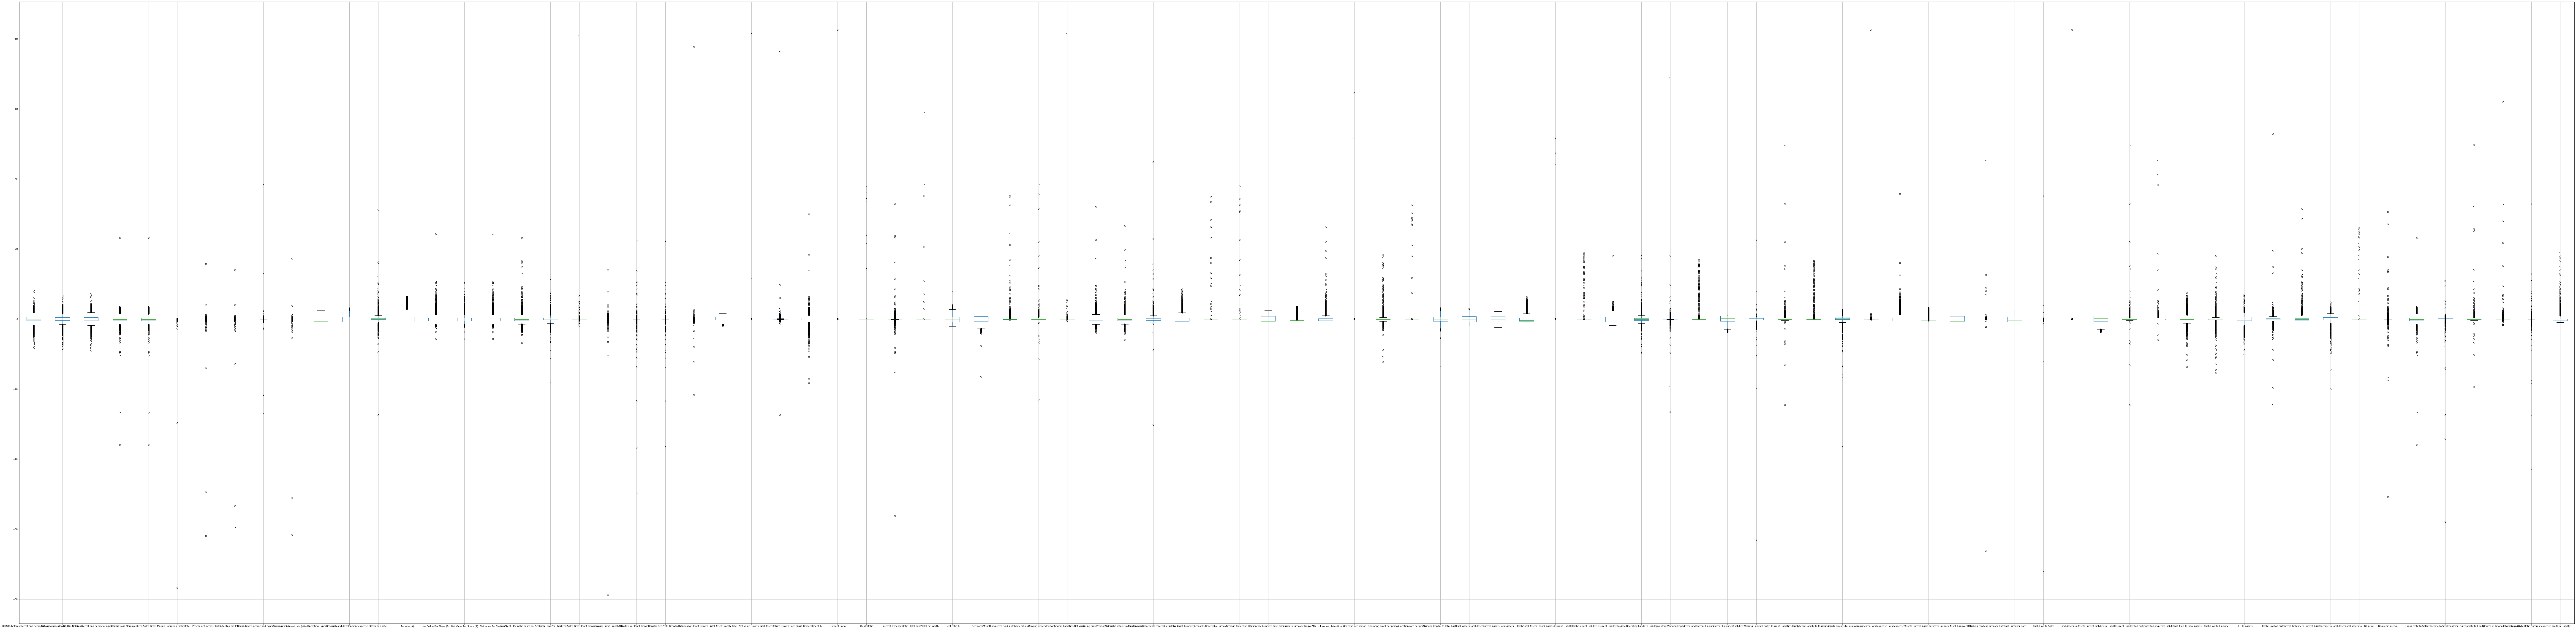

In [124]:
plt.rcParams['figure.figsize'] = (200, 50)
bp = scaled_X.boxplot()

In [92]:
pred = model.predict(X_test)
print(pred.shape)
for i in range(1364):
  if np.argmax(pred[i]) != np.argmax(y_test[i]):
    print(i)

(1364, 2)
6
16
30
39
46
73
88
207
209
214
303
386
432
458
476
500
591
612
703
707
749
772
784
810
834
852
897
901
915
995
998
1003
1013
1031
1073
1081
1086
1103
1110
1113
1134
1137
1144
1164
1172
1173
1185
1252
1262
1270
1272
1277
1280
1310
1320
1340
1343
1354


In [69]:
labels=['nope', 'yes']

In [101]:
i=1277
print(labels[np.argmax(y_test[i])])
print(labels[np.argmax(pred[i])])

nope
yes


In [88]:
X.isnull().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Value Per Share (B)                                    0
 Net Val

In [89]:
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 100)